In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from src.simulation import SolarCellSim
from src.light_model import generate_carriers
from src.field import ElectricField
import src.utils

field = ElectricField(1.0)
carriers = generate_carriers(50, 1e-8, 1e-6)
sim = SolarCellSim(carriers, field, dt = 0.01, steps = 50)


In [83]:
sim.run()
trajectory = sim.trajectory

[TIMEIT] Function 'run' ran in 0.023784s


In [104]:
final_step = trajectory[-1]

electron_x = [x/1e-9 for particle, x in final_step if particle == 'electron']
hole_x = [x/1e-9 for particle, x in final_step if particle == 'hole']

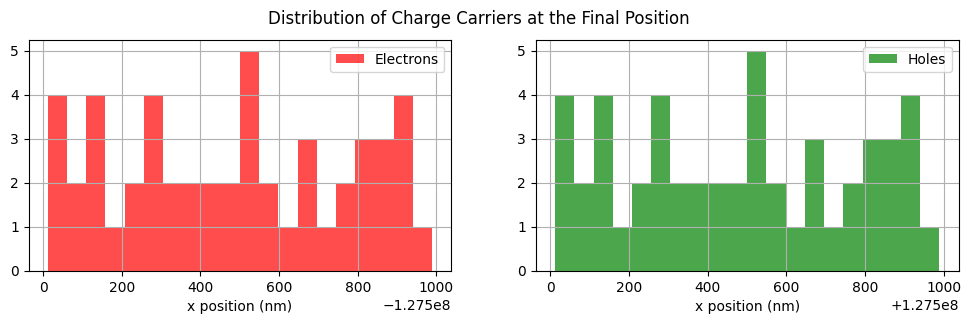

In [149]:
fig, axs = plt.subplots(1, 2, figsize = (12, 3))

axs[1].hist(hole_x, alpha = 0.7, bins = 20, color = 'green', label = 'Holes')
axs[1].set_xlabel("x position (nm)")
axs[1].legend()
axs[1].grid(True)

axs[0].hist(electron_x, alpha = 0.7, color = 'red', bins = 20, label = 'Electrons')
axs[0].set_xlabel("x position (nm)")
axs[0].legend()
axs[0].grid(True)


plt.suptitle("Distribution of Charge Carriers at the Final Position")
plt.show()


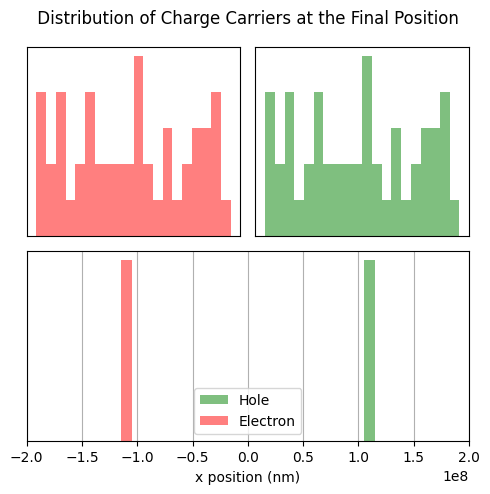

In [148]:
plt.figure(figsize = (5,5), layout = 'tight')

plt.subplot(2,2,1)
plt.hist(electron_x, alpha = 0.5, color = 'red', bins = 20, label = 'Electrons')
plt.xticks([])
plt.yticks([])
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(hole_x, alpha = 0.5, bins = 20, color = 'green', label = 'Holes')
plt.xticks([])
plt.yticks([])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlim(-2e8,2e8)
plt.xlabel('x position (nm)')
plt.yticks([])
#plt.xticks(np.arange(-.15, .15, 0.015))
plt.hist([hole_x, electron_x], alpha = 0.5, color = ['green', 'red'], label = ['Hole', 'Electron'])

plt.grid(True)
plt.suptitle("Distribution of Charge Carriers at the Final Position")
plt.legend()
plt.show()

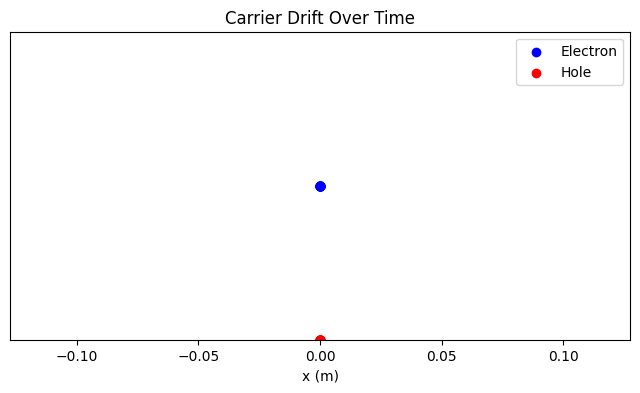

In [156]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 4))
electron_scatter = ax.scatter([], [], color='blue', label='Electron')
hole_scatter = ax.scatter([], [], color='red', label='Hole')
ax.set_xlim(min_val, max_val)
ax.set_ylim(0, 2)
ax.set_title("Carrier Drift Over Time")
ax.set_xlabel("x (m)")
ax.set_yticks([])  
ax.legend()

def update(frame):
    step = trajectory[frame]
    electron_x = [x for kind, x in step if kind == 'electron']
    hole_x = [x for kind, x in step if kind == 'hole']
    electron_scatter.set_offsets(np.c_[electron_x, [1]*len(electron_x)])
    hole_scatter.set_offsets(np.c_[hole_x, [0]*len(hole_x)])
    return electron_scatter, hole_scatter

ani = FuncAnimation(fig, update, frames=len(trajectory), interval=200, blit=True)

#plt.show()


In [97]:
ani.save('data/output/1d_drift_animation.mp4', writer='ffmpeg', fps=30)

ValueError: unknown file extension: .mp4